In [1]:
import os
import contextily as ctx
from asp_plot.bundle_adjust import ReadResiduals, PlotResiduals

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/"

ba_directory = "ba/"

plots_directory = os.path.join(directory, "stereo_report_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

In [3]:
residuals = ReadResiduals(directory, ba_directory)
resid_init_gdf, resid_final_gdf = residuals.get_init_final_residuals_gdfs()
resid_mapprojected_gdf = residuals.get_mapproj_residuals_gdf()
resid_triangulation_uncert_df = residuals.get_propagated_triangulation_uncert_df()

In [4]:
resid_triangulation_uncert_df

,left_image,right_image,horiz_error_median,vert_error_median,horiz_error_mean,vert_error_mean,horiz_error_stddev,vert_error_stddev,num_meas
0,1040010074793300.r100.tif,1040010075633C00.r100.tif,3.181445,8.03649,3.182249,8.036751,0.012553,0.001756,7436


In [5]:
ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

Figure saved to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_report_plots/02_ba_residuals_log.png


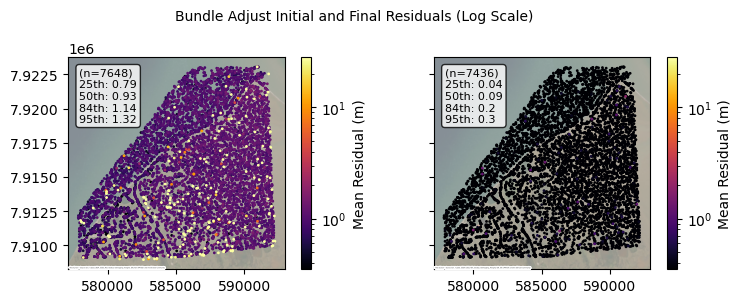

In [6]:
plotter = PlotResiduals(
  [resid_init_gdf, resid_final_gdf],
  lognorm=True,
  title="Bundle Adjust Initial and Final Residuals (Log Scale)"
)

plotter.plot_n_residuals(
    column_name="mean_residual",
    cbar_label="Mean Residual (m)",
    map_crs=map_crs,
    save_dir=plots_directory,
    fig_fn="02_ba_residuals_log.png",
    **ctx_kwargs
)

Figure saved to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_report_plots/03_ba_residuals_linear.png


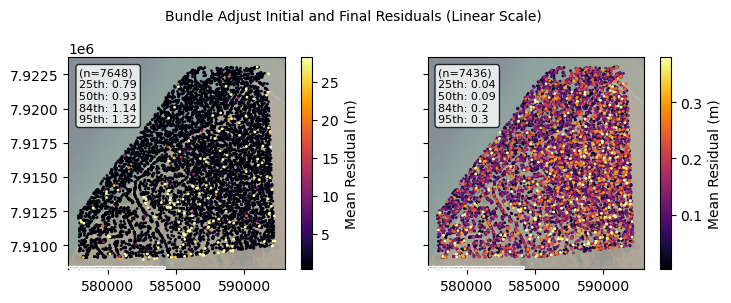

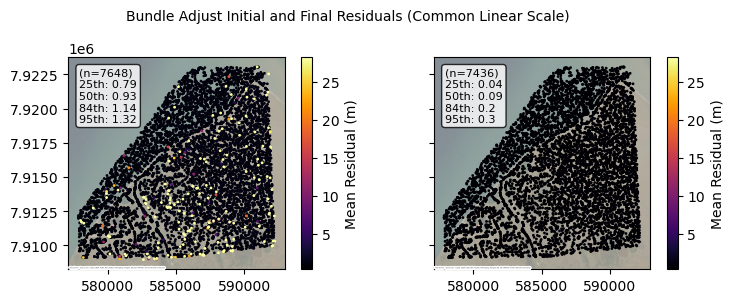

In [7]:
plotter.lognorm = False
plotter.title = "Bundle Adjust Initial and Final Residuals (Linear Scale)"

plotter.plot_n_residuals(
    column_name="mean_residual",
    cbar_label="Mean Residual (m)",
    common_clim=False,
    map_crs=map_crs,
    save_dir=plots_directory,
    fig_fn="03_ba_residuals_linear.png",
    **ctx_kwargs
)


plotter.title = "Bundle Adjust Initial and Final Residuals (Common Linear Scale)"

plotter.plot_n_residuals(
    column_name="mean_residual",
    cbar_label="Mean Residual (m)",
    map_crs=map_crs,
    **ctx_kwargs
)

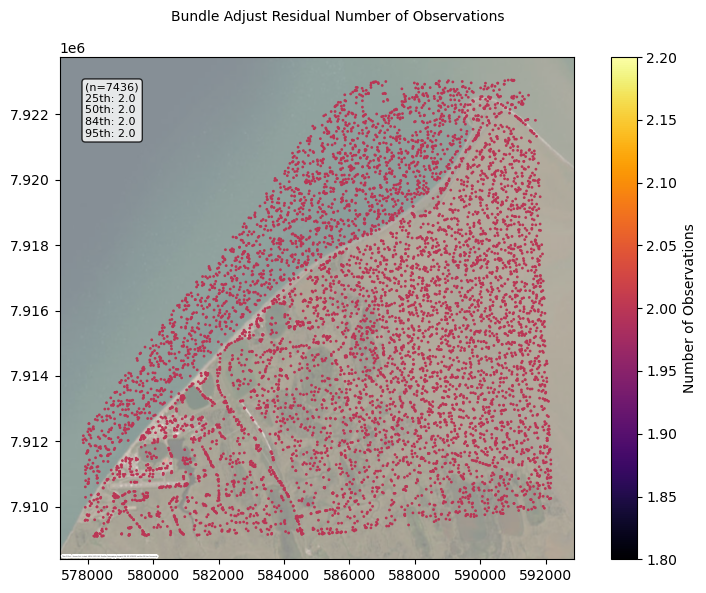

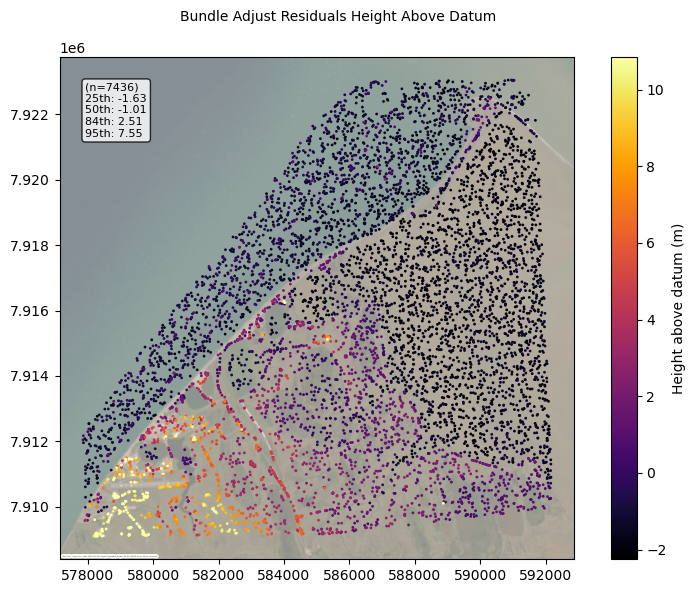

In [8]:
plotter = PlotResiduals(
  [resid_final_gdf],
)

plotter.title = "Bundle Adjust Residual Number of Observations"

plotter.plot_n_residuals(
    column_name="num_observations",
    cbar_label="Number of Observations",
    map_crs=map_crs,
    **ctx_kwargs
)

plotter.title = "Bundle Adjust Residuals Height Above Datum"

plotter.plot_n_residuals(
    column_name="height_above_datum",
    cbar_label="Height above datum (m)",
    map_crs=map_crs,
    **ctx_kwargs
)

Figure saved to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_report_plots/04_ba_residuals_mapproj_dist.png


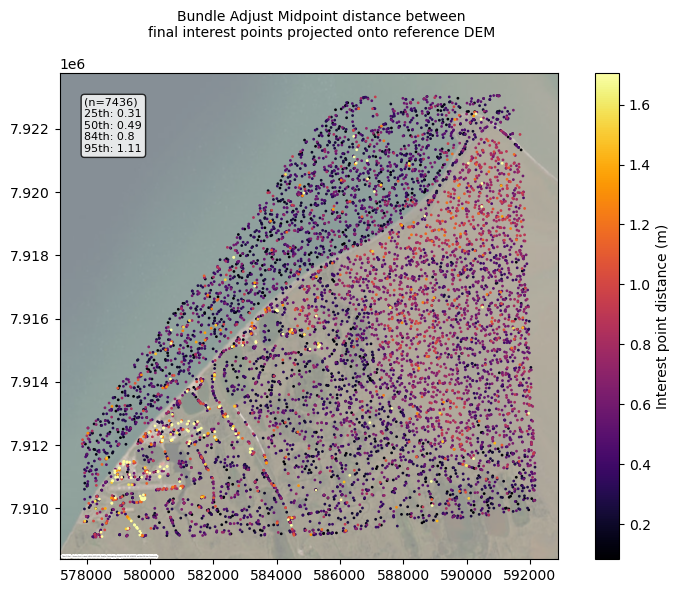

In [9]:
plotter = PlotResiduals(
  [resid_mapprojected_gdf],
  title="Bundle Adjust Midpoint distance between\nfinal interest points projected onto reference DEM",
)

plotter.plot_n_residuals(
    column_name="mapproj_ip_dist_meters",
    cbar_label="Interest point distance (m)",
    map_crs=map_crs,
    save_dir=plots_directory,
    fig_fn="04_ba_residuals_mapproj_dist.png",
    **ctx_kwargs
)